# Istanbul sea transportation system analysis for September 2023

#### Aleyna Hasagdas 2019502123 - Sena Oz 2019502156

The dataset contains information about transitions related to the Istanbul transportation system for September 2023. It includes details such as date, time, line, transfer type, number of passages, and number of passengers.

Note: Id's are not consistent, because we extracted the data as just one road type (which is sea transportation).

Data Source: https://data.ibb.gov.tr/dataset/hourly-public-transport-data-set/resource/b3f67274-4ebc-4453-8f6b-1dcc1b1bf008?inner_span=True

In [100]:
import pandas as pd

sea = pd.read_csv('eylul2023.csv')
sea = sea[sea['road_type'] == 'DENZ']
sea

,_id,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger
27,28,2023-09-17,17,3,DENZ,EMINONU-KADIKOY,Aktarma,6,6
55,56,2023-09-17,16,3,DENZ,MALTEPE-ADALAR,Aktarma,1,1
68,69,2023-09-14,17,3,DENZ,CUBUKLU-ISTINYE,Aktarma,4,4
89,90,2023-09-22,12,3,DENZ,ANADOLU HISARI-KUCUKSU-ASIYAN,Normal,1,1
91,92,2023-09-19,19,3,DENZ,USKUDAR-EMINONU,Aktarma,25,25
...,...,...,...,...,...,...,...,...,...
4200571,4200572,2023-09-13,10,3,DENZ,KABATAS-Y.KADIKOY,Normal,2,2
4200590,4200591,2023-09-07,20,3,DENZ,ADALAR,Normal,93,93
4200594,4200595,2023-09-12,16,3,DENZ,ANADOLU HISARI-KUCUKSU-ASIYAN,Normal,3,3
4200595,4200596,2023-09-21,15,3,DENZ,ADALAR,Aktarma,9,9


In [102]:
sea.describe()

total = sea['number_of_passenger'].sum()
print("Total number of passengers for September 2023: ", total)

Total number of passengers for September 2023:  5592779


The stop names identify the direction of the stops. Such as "KADIKOY-USKUDAR" and "USKUDAR-KADIKOY" are the same line but in different directions.
There are 48 lines in the dataset. 

In [47]:
lines = sea.line.unique()
lines

array(['EMINONU-KADIKOY', 'MALTEPE-ADALAR', 'CUBUKLU-ISTINYE',
       'ANADOLU HISARI-KUCUKSU-ASIYAN', 'USKUDAR-EMINONU',
       'KARAKOY-KADIKOY', 'ESKIHISAR-TOPCULAR', 'ISTINYE-CUBUKLU',
       'BESIKTAS-USKUDAR', 'BOGAZ', 'BOSTANCI-ADALAR',
       'AVCILAR - BOSTANCI', 'USKUDAR-KABATAS', 'KADIKOY-EMINONU',
       'E.KADIKOY-BESIKTAS', 'USKUDAR-BOGAZ', 'KABATAS-ADALAR',
       'KABATAS-USKUDAR', 'ASIYAN-USKUDAR', 'ADALAR-KABATAS', 'ADALAR',
       'BARBAROS-E.KADIKOY', 'KARAKOY-USKUDAR', 'ADALAR-BOSTANCI',
       'KABATAS-Y.KADIKOY', 'Y.KADIKOY-EMINONU', 'KARAKOY-Y.KADIKOY',
       'USKUDAR-BESIKTAS', 'E.KADIKOY-ADALAR', 'Y.KADIKOY-KABATAS',
       'KARAKOY-BOSTANCI', 'CENGELKOY-KABATAS', 'EMINONU-USKUDAR',
       'BESIKTAS-ADALAR', 'USKUDAR-ORTAKOY', 'YENIKOY-BEYKOZ',
       'AVCILAR - BAKIRKOY-KADIKOY', 'Y.KADIKOY-KARAKOY', 'HALIC',
       'SIRKECI-HAREM', 'BOSTANCI-AVCILAR', 'BEYKOZ-YENIKOY',
       'BOSTANCI - MODA - KADIKOY - KABATAS', 'KADIKOY-ORTAKOY',
       'BOSTANCI-KABATAS

In [48]:
stops = []

for line in lines:
    if " " in line:
        line = line.replace(" ", "")
        for x in line.split('-'):
            stops.append(x)
    else:
        for x in line.split('-'):
            stops.append(x)

stops = set(stops)
stops

{'ADALAR',
 'ANADOLUHISARI',
 'ASIYAN',
 'AVCILAR',
 'BAKIRKOY',
 'BARBAROS',
 'BESIKTAS',
 'BEYKOZ',
 'BOGAZ',
 'BOSTANCI',
 'CENGELKOY',
 'CUBUKLU',
 'E.KADIKOY',
 'EMINONU',
 'ESKIHISAR',
 'HALIC',
 'HAREM',
 'ICHATLAR',
 'ISTINYE',
 'KABATAS',
 'KADIKOY',
 'KARAKOY',
 'KUCUKSU',
 'MALTEPE',
 'MODA',
 'ORTAKOY',
 'SIRKECI',
 'TOPCULAR',
 'USKUDAR',
 'Y.KADIKOY',
 'YENIKAPI',
 'YENIKOY'}

In [49]:
print("Earliest transition date: ", sea['transition_date'].min())
print("Latest transition date: ", sea['transition_date'].max())

Earliest transition date:  2023-09-01
Latest transition date:  2023-09-30


### Number of passengers for each line

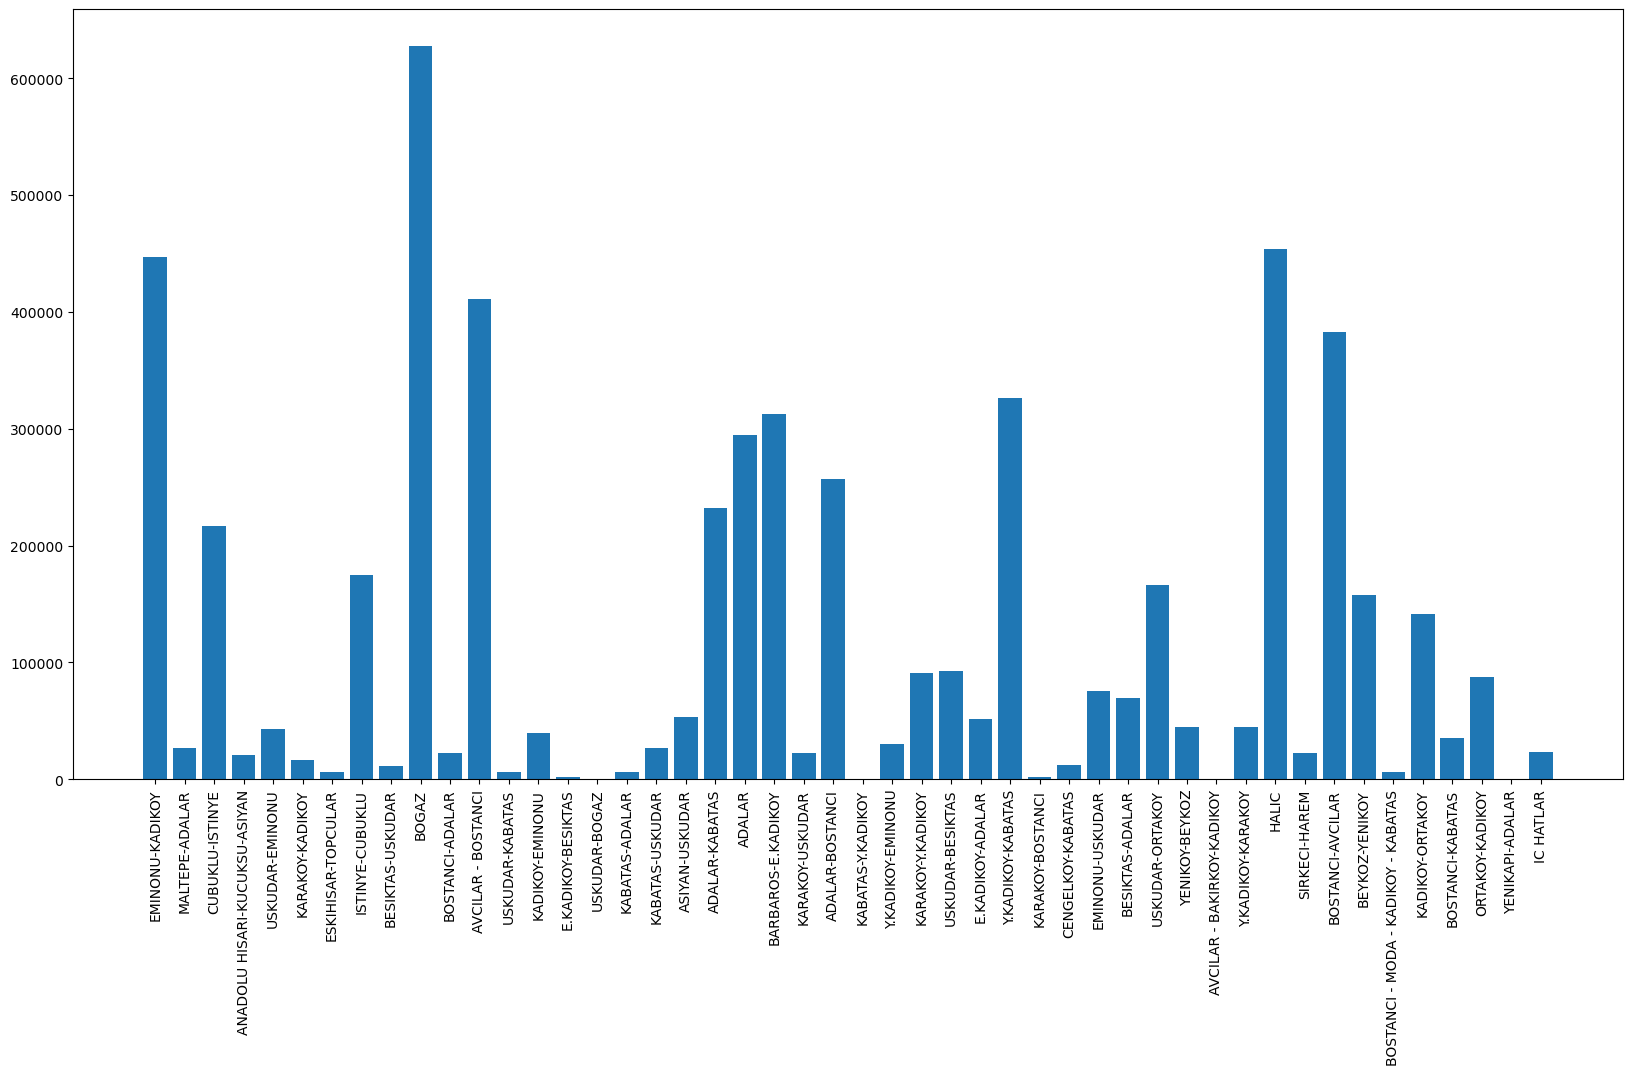

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(lines, sea.groupby('line')['number_of_passenger'].sum())
plt.xticks(rotation=90)
plt.show()


#### Pie chart for the top 10 lines with the number of passengers

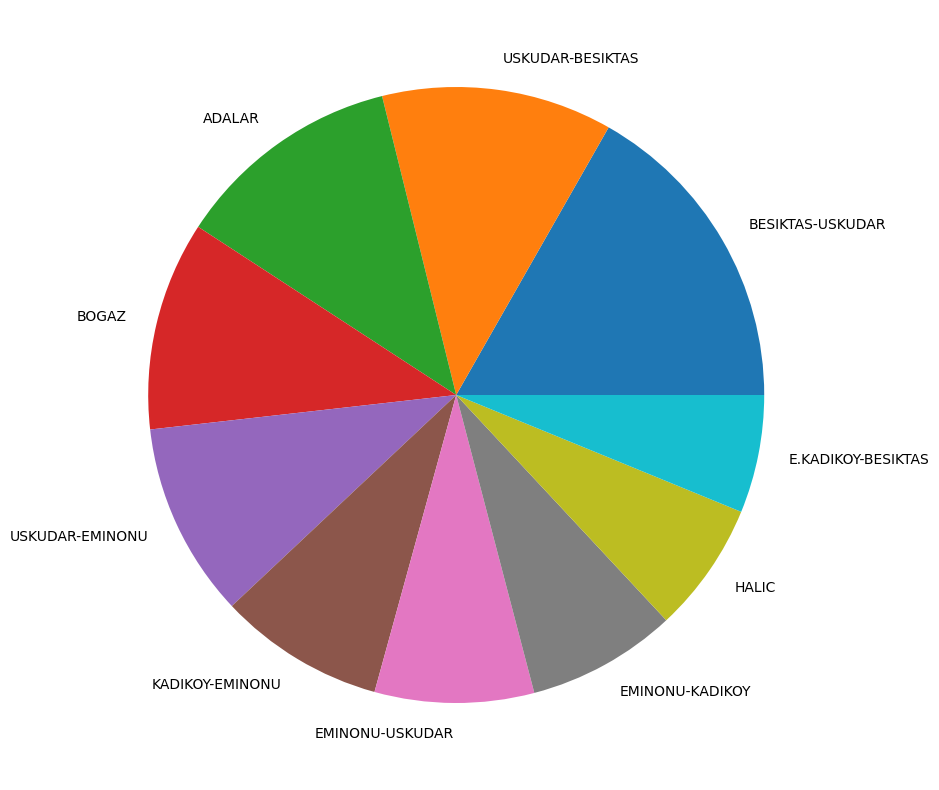

In [51]:
plt.figure(figsize=(20, 10))
plt.pie(sea.groupby('line')['number_of_passenger'].sum().nlargest(10),
        labels=sea.groupby('line')['number_of_passenger'].sum().nlargest(10).index)
plt.show()


# Density Calculation
Density = ( current number_of_passenger / maximum of number_of_passenger of line in all times )
for each line for each transition_hour, and find day of week and add it to the dataframe

In [52]:
df = sea.copy()
df['density'] = df['number_of_passenger'] / df.groupby('line')['number_of_passenger'].transform('max')
df['day_of_week'] = pd.to_datetime(df['transition_date']).dt.day_name()
df.head()

,_id,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,density,day_of_week
27,28,2023-09-17,17,3,DENZ,EMINONU-KADIKOY,Aktarma,6,6,0.008955,Sunday
55,56,2023-09-17,16,3,DENZ,MALTEPE-ADALAR,Aktarma,1,1,0.007519,Sunday
68,69,2023-09-14,17,3,DENZ,CUBUKLU-ISTINYE,Aktarma,4,4,0.052632,Thursday
89,90,2023-09-22,12,3,DENZ,ANADOLU HISARI-KUCUKSU-ASIYAN,Normal,1,1,0.010526,Friday
91,92,2023-09-19,19,3,DENZ,USKUDAR-EMINONU,Aktarma,25,25,0.042955,Tuesday


## Heatmap for average density
Group by transition_hour and day_of_week

/var/folders/vm/b4p208t10117gt9zdll3kq_r0000gn/T/ipykernel_8017/3301018092.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(df.groupby(['transition_hour', 'day_of_week'])['density'].mean().unstack(), cmap='coolwarm')


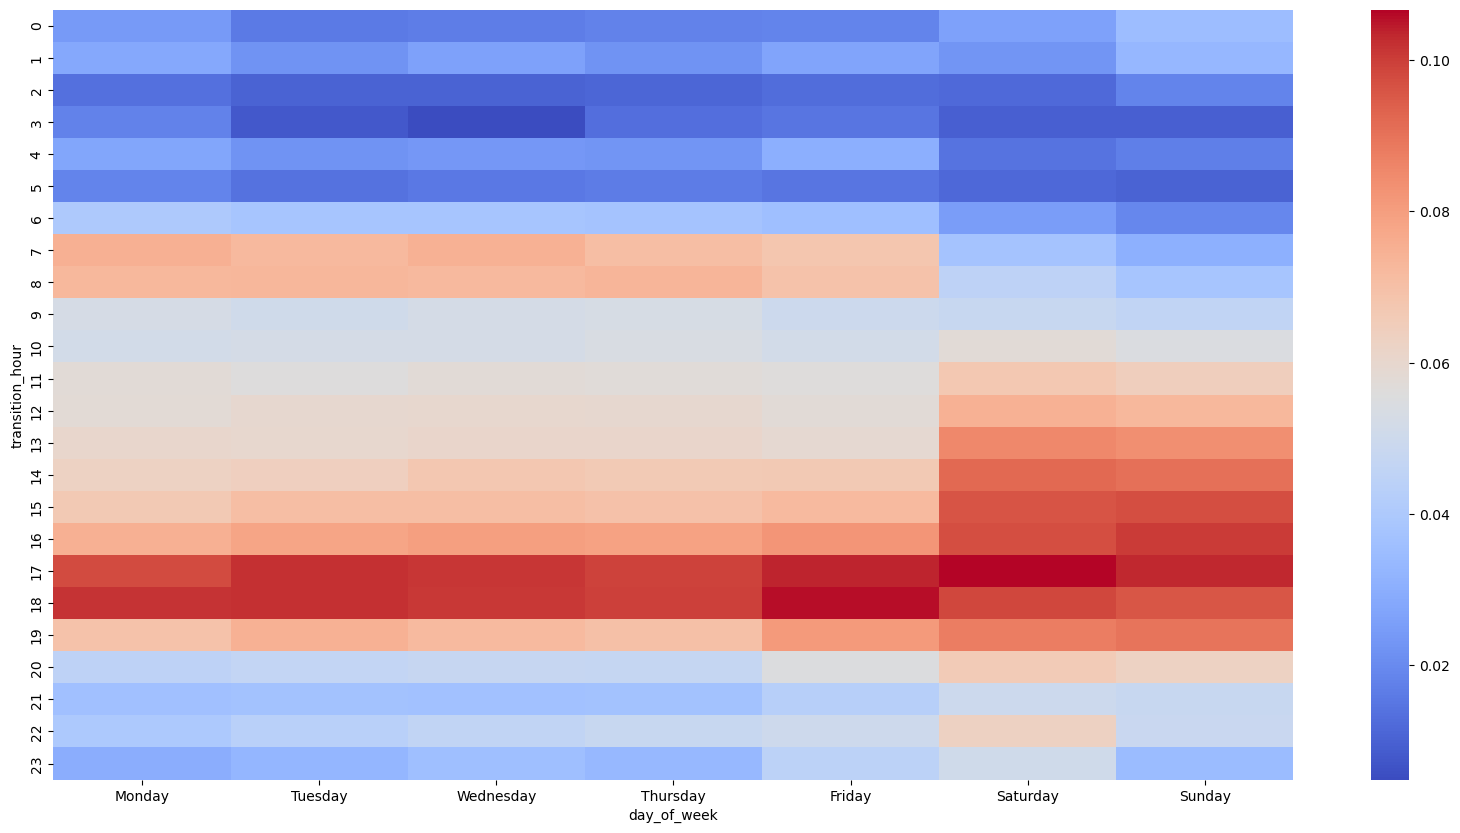

In [53]:
import seaborn as sns

plt.figure(figsize=(20, 10))
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                                                  'Friday', 'Saturday', 'Sunday'], ordered=True)
sns.heatmap(df.groupby(['transition_hour', 'day_of_week'])['density'].mean().unstack(), cmap='coolwarm')
plt.show()

The bar graph for each line in lines for the density and group by day_of_week and add title to each graph 

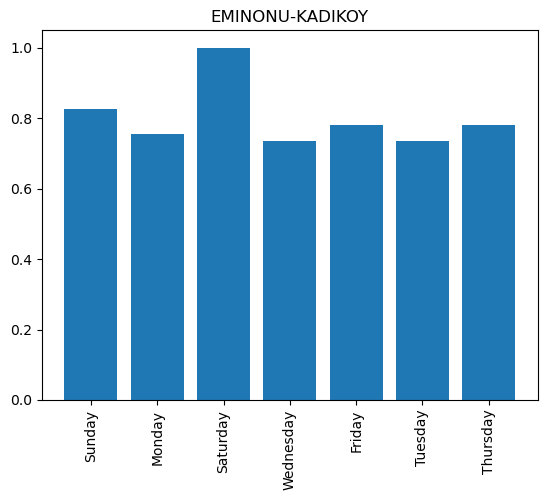

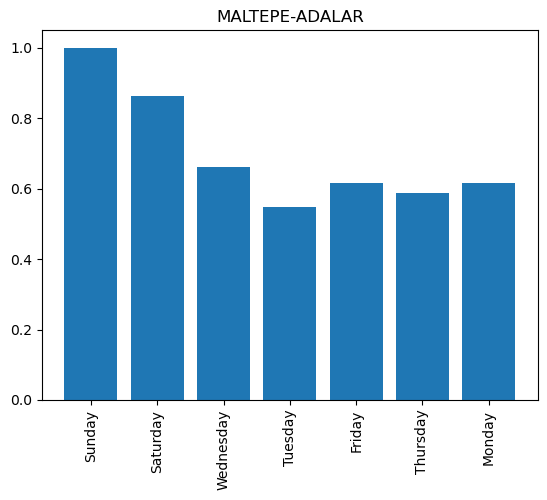

In [54]:
for line in lines[:2]:
    plt.bar(df[df['line'] == line].day_of_week, df[df['line'] == line].density)
    plt.xticks(rotation=90)
    plt.title(line)
    plt.show()


### The bar graphs for each line in lines for the density and group by transition_hour:

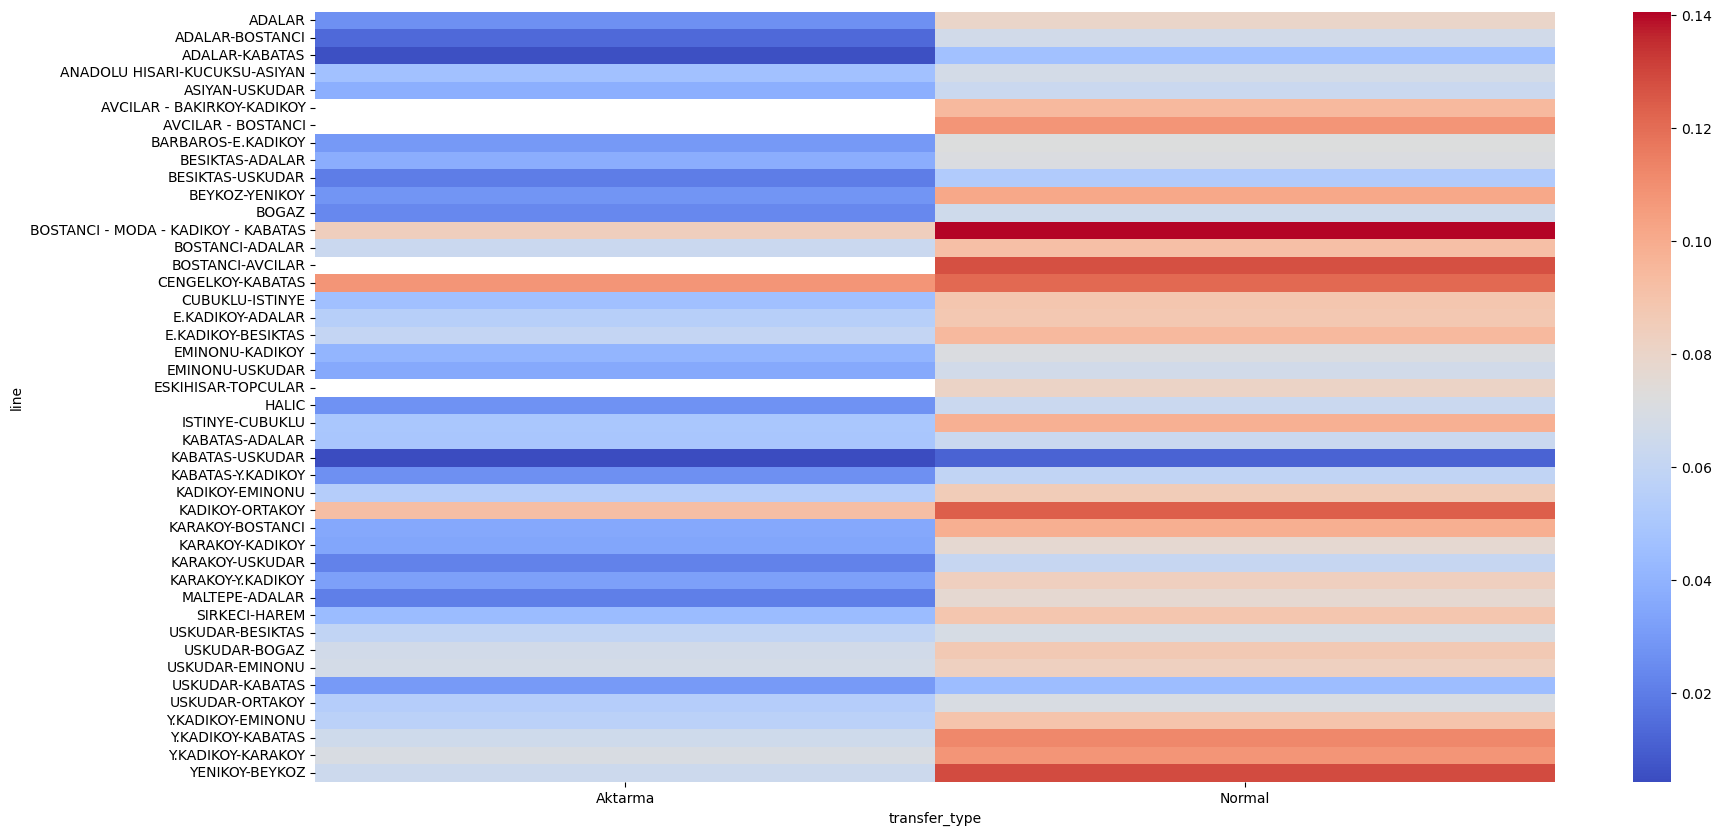

In [99]:
dfCopy = df.copy()
dfCopy = dfCopy[dfCopy['line'] != 'BOSTANCI-KABATAS']
dfCopy = dfCopy[dfCopy['line'] != 'IC HATLAR']
dfCopy = dfCopy[dfCopy['line'] != 'YENIKAPI-ADALAR']
dfCopy = dfCopy[dfCopy['line'] != 'ORTAKOY-KADIKOY']
plt.figure(figsize=(20, 10))
sns.heatmap(dfCopy.groupby(['line', 'transfer_type'])['density'].mean().unstack(), cmap='coolwarm')
plt.show()

#### Heatmap for density grouped by hour and lines

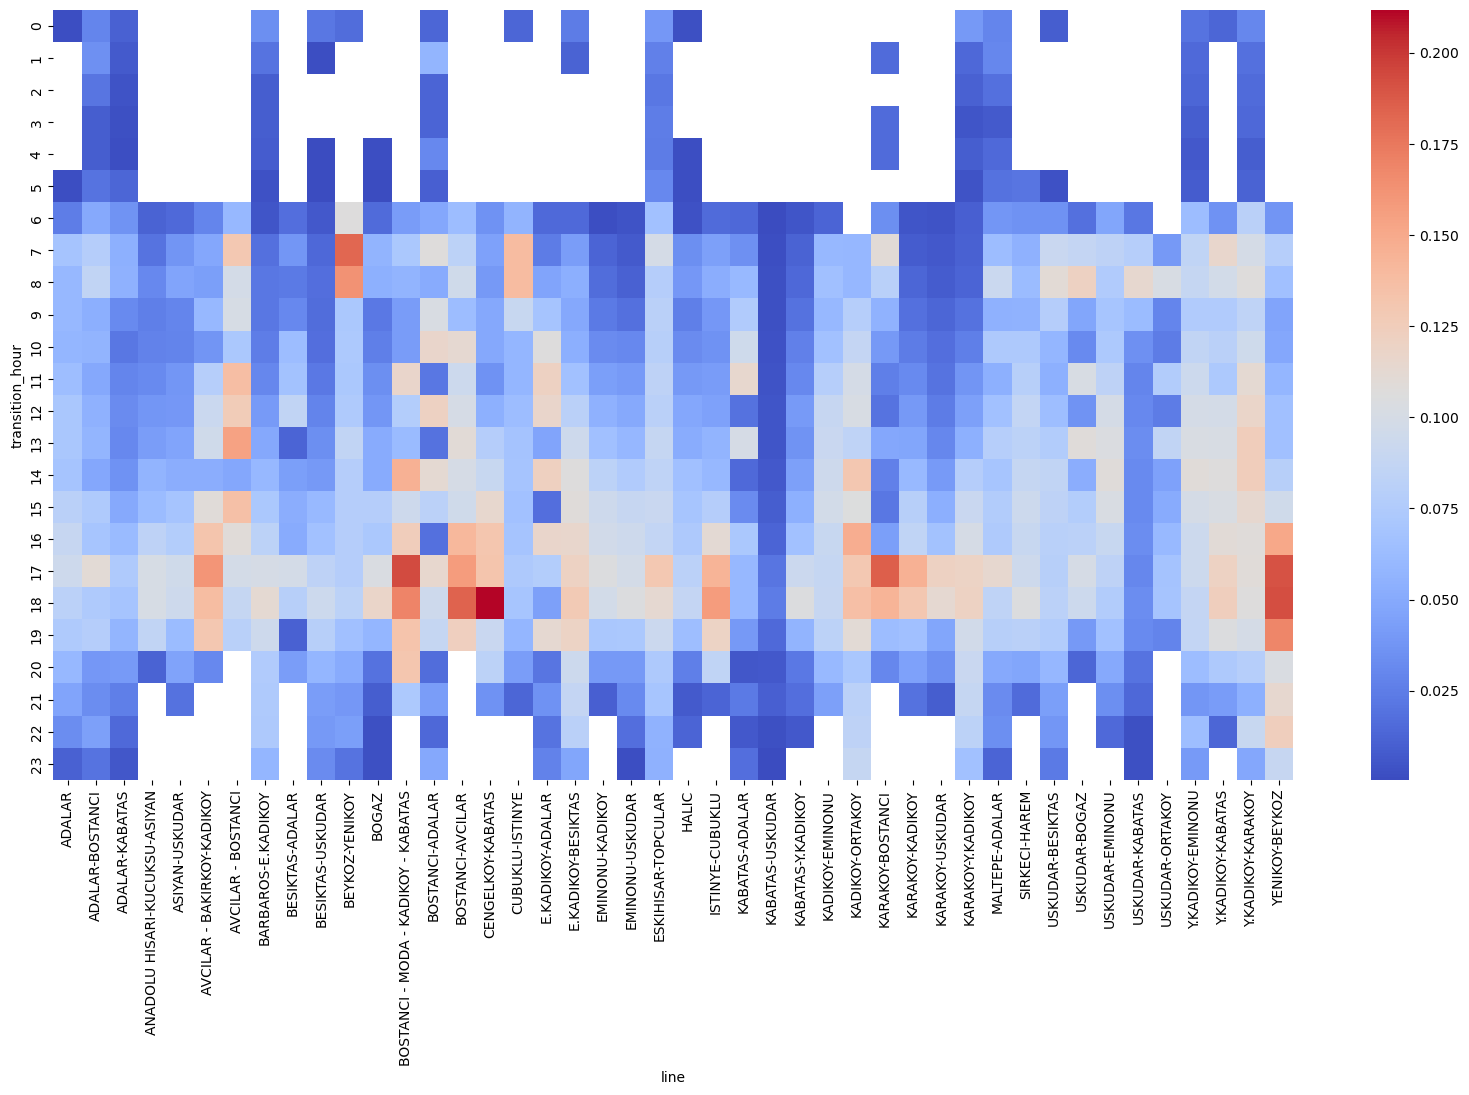

In [84]:
plt.figure(figsize=(20, 10))
dfCopy = df.copy()
dfCopy = dfCopy[dfCopy['line'] != 'BOSTANCI-KABATAS']
dfCopy = dfCopy[dfCopy['line'] != 'IC HATLAR']
dfCopy = dfCopy[dfCopy['line'] != 'YENIKAPI-ADALAR']
dfCopy = dfCopy[dfCopy['line'] != 'ORTAKOY-KADIKOY']
sns.heatmap(dfCopy.groupby(['transition_hour', 'line'])['density'].mean().unstack(), cmap='coolwarm')
plt.show()

### The bar graphs for each line in lines for the density and group by day_of_week:

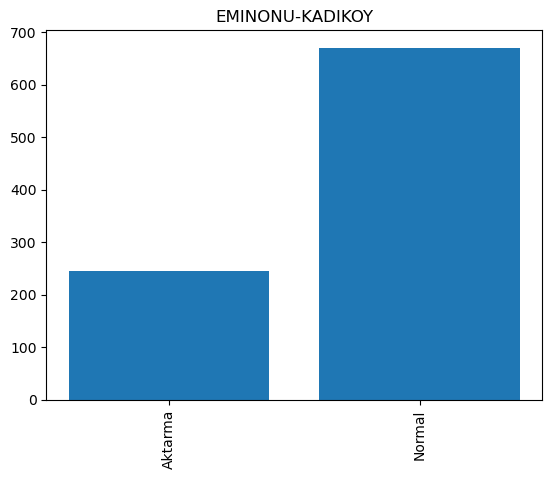

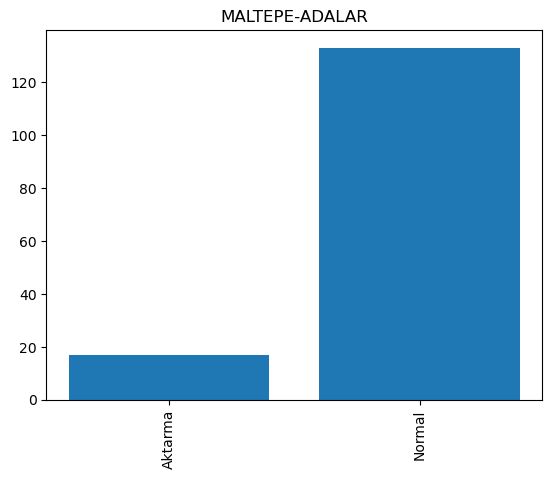

In [56]:
for line in lines[:2]:
    plt.bar(sea[sea['line'] == line].transfer_type, sea[sea['line'] == line].number_of_passenger)
    plt.xticks(rotation=90)
    plt.title(line)
    plt.show()


# Comparing hourly density of weekdays and weekends 
The bar graphs compare the hourly density of weekdays and weekend average densities for each line in separate graphs

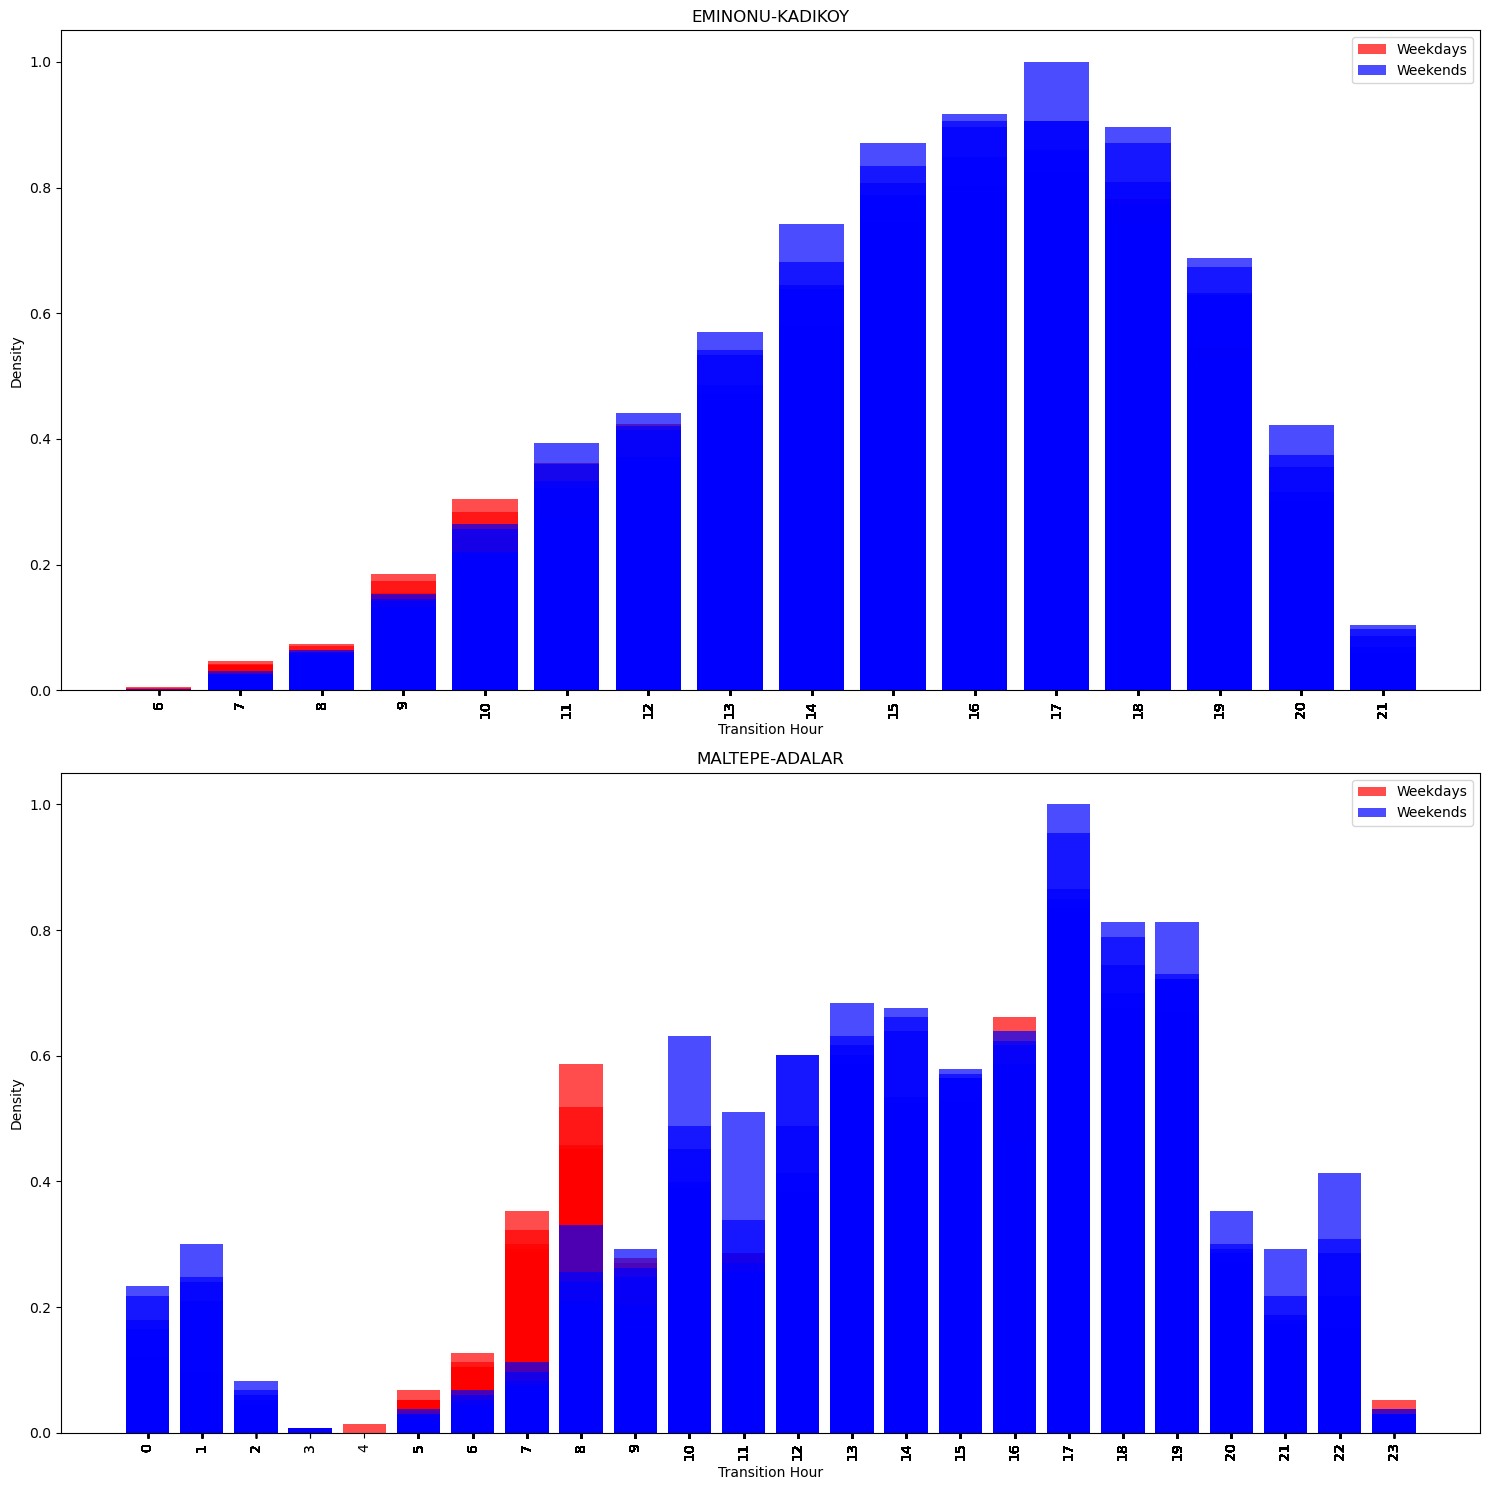

In [57]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))

for i, line in enumerate(lines[:2]):
    ax = axs[i]
    weekdays_data = df[(df['line'] == line) & (df['day_of_week'] != 'Saturday') & (df['day_of_week'] != 'Sunday')]
    weekends_data = df[(df['line'] == line) & ((df['day_of_week'] == 'Saturday') | (df['day_of_week'] == 'Sunday'))]

    ax.bar(weekdays_data.transition_hour, weekdays_data.density, color='r', label='Weekdays', alpha=0.7)
    ax.bar(weekends_data.transition_hour, weekends_data.density, color='b', label='Weekends', alpha=0.7)
    ax.set_title(line)
    ax.legend()

    ax.set_xticks(weekdays_data.transition_hour)
    ax.set_xticklabels(weekdays_data.transition_hour, rotation=90)
    ax.set_xlabel('Transition Hour')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

# The most used lines for "Aktarma" and "Normal" transfer_type 


In [58]:
# "Aktarma"
sea[sea['transfer_type'] == 'Aktarma'].groupby('line')['number_of_passenger'].sum().idxmax()

'USKUDAR-BESIKTAS'

In [59]:
# "Normal"
sea[sea['transfer_type'] == 'Normal'].groupby('line')['number_of_passenger'].sum().idxmax()

'BESIKTAS-USKUDAR'

# The top 3 lines of most crowded in the between 6 and 10

In [85]:
sea[(sea['transition_hour'] >= 6) & (sea['transition_hour'] <= 10)].groupby('line')[
    'number_of_passenger'].sum().nlargest(3)

line
USKUDAR-BESIKTAS    133153
ADALAR              102319
USKUDAR-EMINONU     101181
Name: number_of_passenger, dtype: int64

# The top 3 lines of most crowded in the between 16 and 18

In [61]:
sea[(sea['transition_hour'] >= 16) & (sea['transition_hour'] <= 18)].groupby('line')[
    'number_of_passenger'].sum().nlargest(3)

line
BESIKTAS-USKUDAR    209477
BOGAZ               162636
EMINONU-USKUDAR     119295
Name: number_of_passenger, dtype: int64

# Istanbul Stops Map

The map shows the location of the stops on the map and the number of passengers for each stop.

In [88]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

stopsWithLocations = {
    'ADALAR': [40.8737, 29.1278],
    'ANADOLUHISARI': [41.083218, 29.066856],
    'ASIYAN': [41.080949, 29.054243],
    'AVCILAR': [40.971055, 28.718280],
    'BAKIRKOY': [40.972386, 28.877340],
    'BARBAROS': [41.045833, 29.004722],
    'BESIKTAS': [41.042222, 29.007778],
    'BEYKOZ': [41.123611, 29.108333],
    'BOGAZ': [41.106944, 29.038889],
    'BOSTANCI': [40.963889, 29.091667],
    'CENGELKOY': [41.054167, 29.054167],
    'CUBUKLU': [41.079167, 29.054167],
    'E.KADIKOY': [40.981944, 29.027778],
    'EMINONU': [41.016667, 28.966667],
    'ESKIHISAR': [40.776389, 29.436111],
    'HALIC': [41.046111, 28.948889],
    'HAREM': [41.033333, 29.033333],
    'ICHATLAR': [41.033333, 28.933333],
    'ISTINYE': [41.108333, 29.050000],
    'KABATAS': [41.036111, 28.985833],
    'KADIKOY': [40.991667, 29.027778],
    'KARAKOY': [41.026389, 28.973611],
    'KUCUKSU': [41.083333, 29.066667],
    'MALTEPE': [40.933333, 29.133333],
    'MODA': [40.983333, 29.033333],
    'ORTAKOY': [41.050000, 29.033333],
    'SIRKECI': [41.016667, 28.966667],
    'TOPCULAR': [40.983333, 29.033333],
    'USKUDAR': [41.024722, 29.017778],
    'Y.KADIKOY': [40.981944, 29.027778],
    'YENIKAPI': [41.010833, 28.967500],
    'YENIKOY': [41.116667, 29.066667],
}

deniz = sea.copy()

deniz['coordinates'] = deniz['line'].apply(lambda x: stopsWithLocations.get(x))
deniz = deniz.dropna(subset=['coordinates'])

deniz[['latitude', 'longitude']] = pd.DataFrame(deniz['coordinates'].tolist(), index=deniz.index)
deniz.drop('coordinates', axis=1, inplace=True)

gdf = gpd.GeoDataFrame(deniz, geometry=gpd.points_from_xy(deniz.longitude, deniz.latitude))

m = folium.Map(location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()], zoom_start=10)

for stop, coords in stopsWithLocations.items():
    folium.Marker(coords, tooltip=stop).add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['line']} - Yolcu Sayısı: {row['number_of_passenger']}",
    ).add_to(marker_cluster)

m.save('Istanbul_Stops_Map.html')


## Bokeh Scatter Plot for density and hour for BESIKTAS-USKUDAR  

In [86]:
from bokeh.plotting import figure, show

x = df[df['line'] == 'BESIKTAS-USKUDAR']['transition_hour'].tolist()
y = df[df['line'] == 'BESIKTAS-USKUDAR']['density'].tolist()

p = figure(title="Bokeh Scatter Plot", x_axis_label='Transition Hour', y_axis_label='Density')
p.circle(x, y, size=10, color="red", legend_label="Data Points")

show(p)

In [87]:
# Bokeh Scatter Plot for density and hour for uskudar besiktas line

x = df[df['line'] == 'USKUDAR-BESIKTAS']['transition_hour'].tolist()
y = df[df['line'] == 'USKUDAR-BESIKTAS']['density'].tolist()

p = figure(title="Bokeh Scatter Plot", x_axis_label='Transition Hour', y_axis_label='Density')
p.circle(x, y, size=10, color="red", legend_label="Data Points")

show(p)

# Cartopy Map for Istanbul Stops

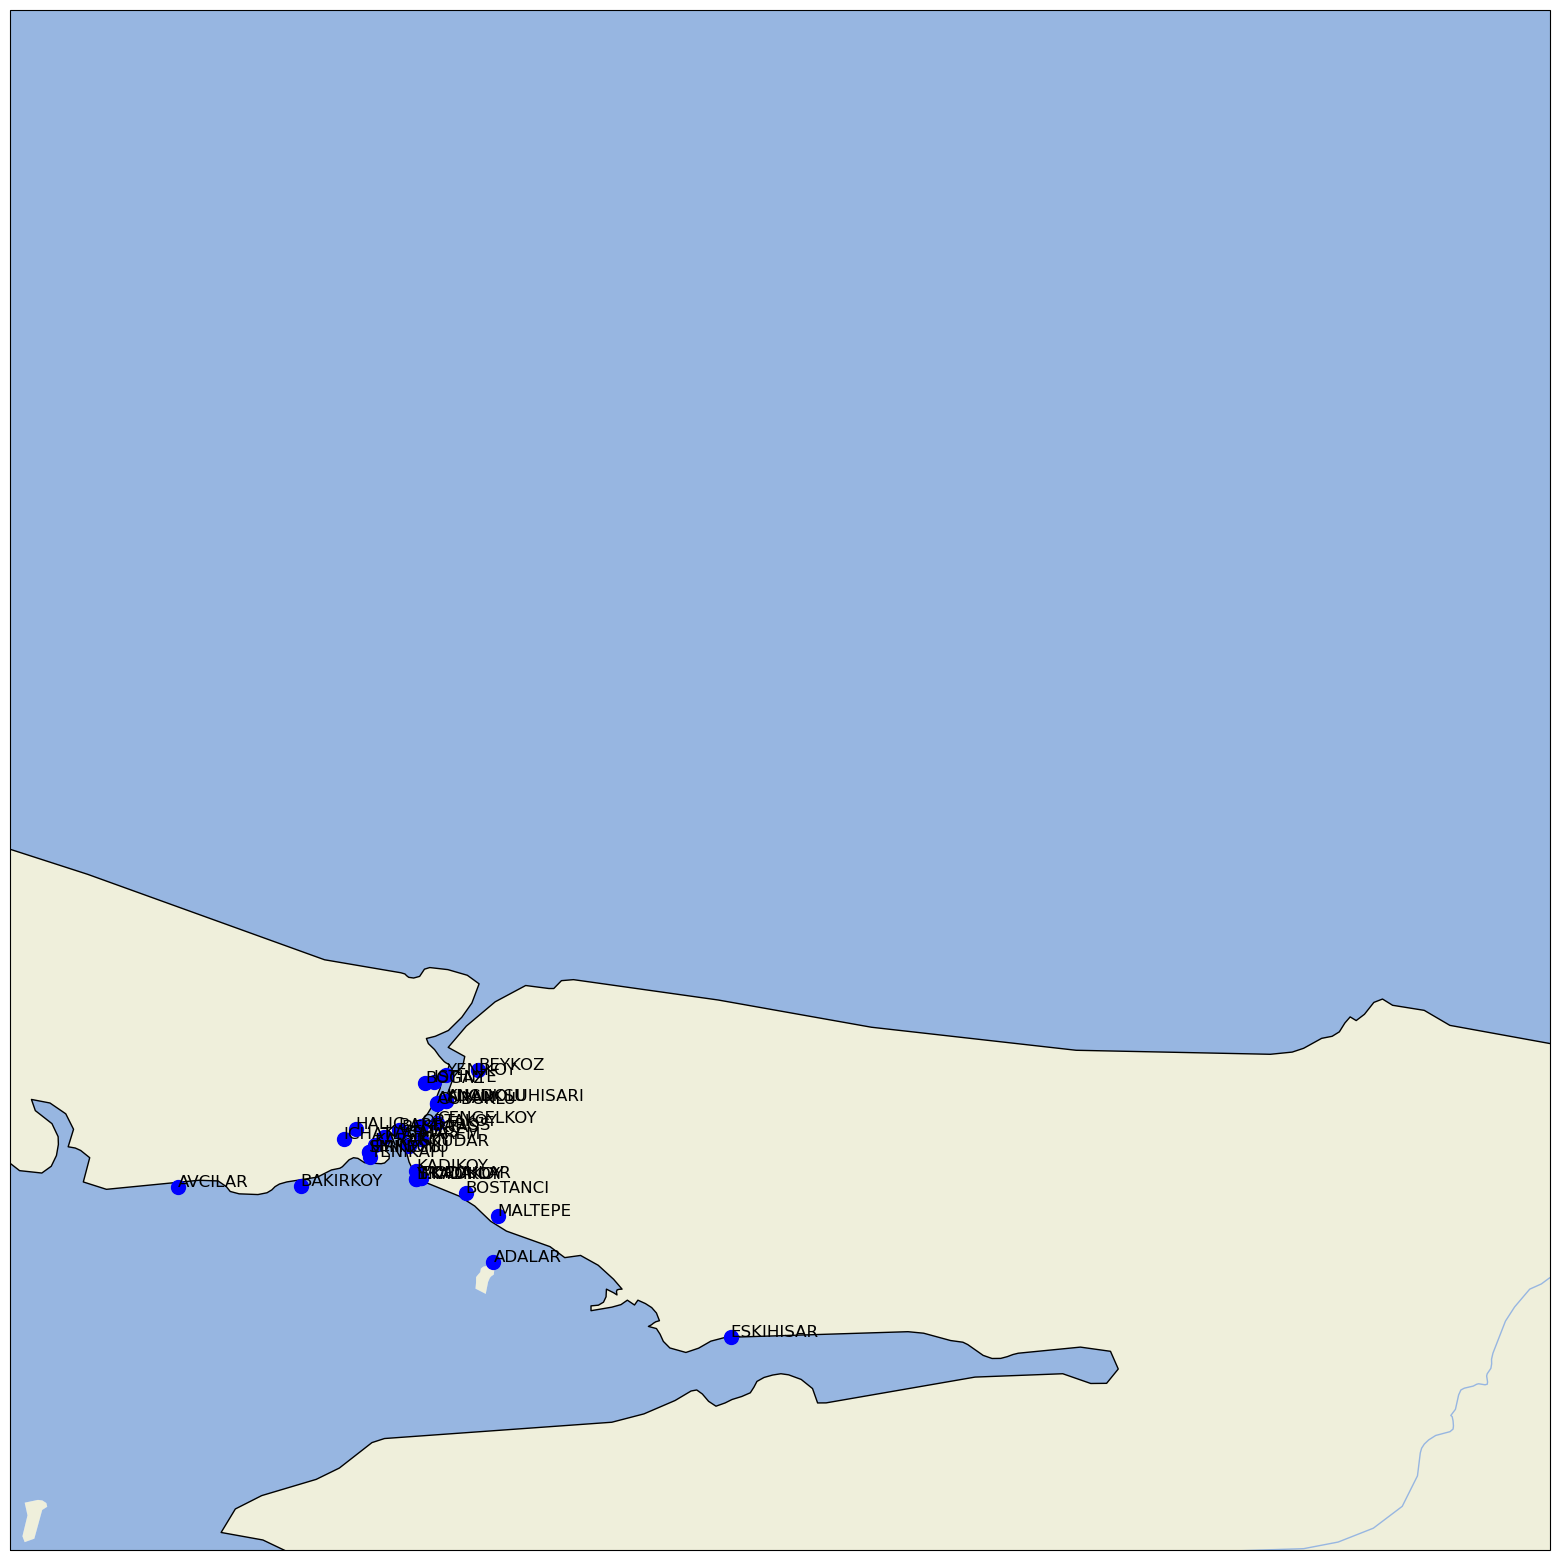

In [64]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([28.5, 30.5, 40.5, 42.5])

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

for stop, coords in stopsWithLocations.items():
    plt.plot(coords[1], coords[0], 'bo', markersize=10)
    plt.text(coords[1], coords[0], stop, fontsize=12)

plt.show()
